Clustering Antarctic Penguin Species
----
You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as penguins.csv

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

Column	Description
culmen_depth_mm	-    culmen depth (mm)


flipper_length_mm	-    flipper length (mm)


body_mass_g	  -    body mass (g)


sex	penguin	  -    sex



Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: Adelie, Chinstrap, and Gentoo. Your task is to apply your data science skills to help them identify groups in the dataset!


-------
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [132]:
#Importing The Dataset
penguins = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\penguins.csv")
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,36.7,19.3,193,3450,FEMALE
4,39.3,20.6,190,3650,MALE


Data Cleaning
----

In [133]:
penguins.shape

(342, 5)

In [134]:
# Check the number of missing values in each column
penguins.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [135]:
# Drop rows where the 'sex' column has missing values (NaN)
penguins.dropna(subset=['sex'], inplace=True)

# Check the number of missing values again after dropping rows
penguins.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [136]:
# Check the current shape (rows, columns) of the DataFrame
penguins.shape

(335, 5)

In [137]:
# Print all unique values in the 'sex' column
print(penguins['sex'].unique())

['MALE' 'FEMALE' '.']


In [138]:
# Replace any '.' values in 'sex' with NaN
penguins['sex'] = penguins['sex'].replace('.', np.nan)

# Drop rows where 'sex' is now NaN (after replacing '.')
penguins = penguins.dropna(subset=['sex'])

# Check the shape of the DataFrame again after cleaning
penguins.shape

(334, 5)

Preprocessing
-----
To prepare the dataset for analysis, start by converting the categorical feature into dummy variables. This process transforms each category into a separate binary column, where values indicate the presence or absence of that category. Once the dummy variables are created, remove the original categorical column to avoid redundancy and ensure the dataset contains only numerical features suitable for modeling.

In [139]:
penguins_dum = pd.get_dummies(penguins, drop_first=True).astype(int)
penguins_dum.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39,18,181,3750,1
1,39,17,186,3800,0
2,40,18,195,3250,0
3,36,19,193,3450,0
4,39,20,190,3650,1


-----
Before applying clustering algorithms, it is important to standardize or scale the data. Features in different units or ranges can distort the clustering results because algorithms like KMeans rely on distance calculations. Standardization rescales the data so that each feature has a mean of zero and a standard deviation of one. This ensures that all features contribute equally to the clustering process, preventing larger-valued features from dominating the distance measurements.


In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(penguins_dum)
penguins_pp = pd.DataFrame(data=X, columns = penguins_dum.columns)
penguins_pp.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.834119,0.630709,-0.126674,-0.569485,0.988095
1,-0.834119,0.127948,-0.107681,-0.507204,-1.012049
2,-0.651074,0.630709,-0.073493,-1.192302,-1.012049
3,-1.383257,1.133469,-0.081090,-0.943175,-1.012049
4,-0.834119,1.636230,-0.092486,-0.694049,0.988095


Detect the optimal number of clusters for k-means clustering
----
To find the optimal number of clusters for k-means clustering, perform an Elbow analysis. Fit KMeans models with different numbers of clusters and calculate the inertia for each model. Plot the number of clusters against the corresponding inertia values. The point where the curve starts to bend or form an “elbow” indicates the ideal number of clusters, as adding more clusters beyond this point provides little improvement in reducing inertia.


In [141]:
from sklearn.cluster import KMeans

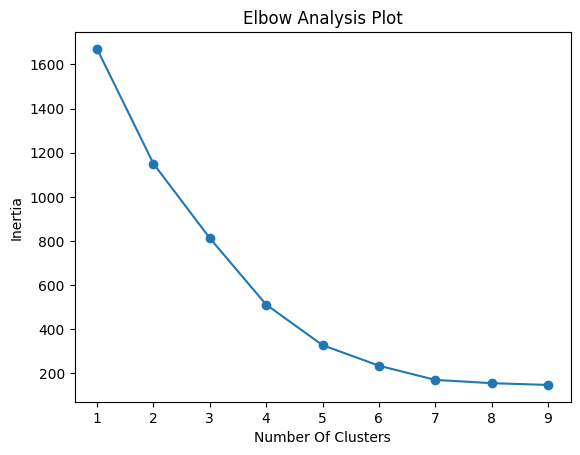

In [142]:
ks = range(1,10)
inertia = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42).fit(penguins_pp)
    inertia.append(model.inertia_)
plt.plot(ks, inertia, marker='o')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Analysis Plot');

In [143]:
n_clusters = 4

Run the k-means clustering algorithm
----
With the optimal number of clusters determined, apply the k-means clustering algorithm to the preprocessed data. Initialize the KMeans model with the chosen number of clusters and fit it to the dataset. The algorithm will assign each data point to the nearest cluster center, creating distinct groups based on the patterns in the data.


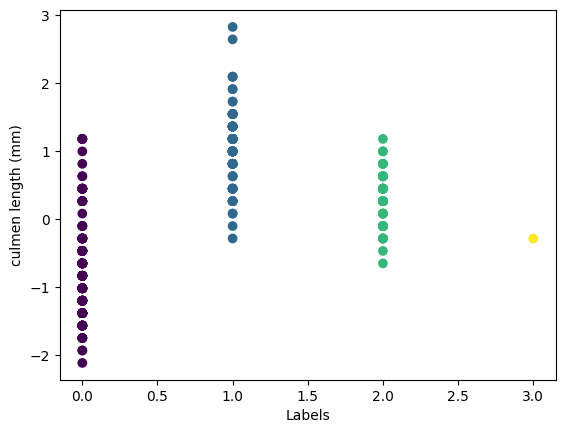

In [144]:
kmeans = KMeans(n_clusters = n_clusters).fit(penguins_pp)
penguins_pp['label'] = kmeans.labels_
plt.scatter(penguins_pp['label'], penguins_pp['culmen_length_mm'], c=kmeans.labels_)
plt.xlabel('Labels')
plt.ylabel('culmen length (mm)')
plt.show()

Create a final statistical DataFrame for each cluster.
----
After clustering, generate a statistical summary for each cluster to understand its characteristics. Add the cluster labels to the dataset, then group the data by these labels. Use the `groupby` method along with the `mean` function to calculate the average values of the numeric columns for each cluster. The result is a DataFrame that highlights the key numerical features of every cluster.


In [147]:
print(penguins_pp.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_MALE', 'label'],
      dtype='object')


In [148]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', 'label']
stat_penguins = penguins_pp[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,-0.720906,0.505745,-0.098634,-0.705209
1,1.068833,-0.021387,-0.006886,0.873167
2,0.288976,-1.474069,-0.007114,0.572169
3,-0.284982,1.636230,18.178878,0.053331
